In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#Loading data
stocks_ = pd.read_csv("Sbux.csv")

In [4]:
#The first five rows of the Sbux data
stocks_.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [5]:
stocks_.shape

(1259, 7)

In [6]:
#Checking the stocks information
stocks_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [7]:
#Checking for duplicates
duplicates = stocks_.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [8]:
#Checking for missing values
missing_values = stocks_.isnull().sum()
missing_values

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [9]:
#the uniqueness of Name
pd.unique(stocks_['Name'])

array(['SBUX'], dtype=object)

In [10]:
#Drop irrelevant columns "Dates"
stocks_ = stocks_.drop(columns=['date'])

In [11]:
#Scaling the numerical features
X = stocks_[['open','high', 'low', 'close', 'volume']]
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled = pd.DataFrame(X_scaled,columns=['open', 'high', 'close','low','volume'])
X_scaled

,open,high,close,low,volume
0,-1.966715,-1.950600,-1.945325,-1.941447,-0.475799
1,-1.933975,-1.956817,-1.944354,-1.952518,-0.861361
2,-1.959011,-1.955382,-1.939985,-1.946742,-0.128964
3,-1.936864,-1.959687,-1.961830,-1.967439,-0.504161
4,-1.981640,-1.990774,-1.969112,-1.980917,-0.075638
...,...,...,...,...,...
1254,0.764152,0.736804,0.770212,0.736229,1.246357
1255,0.727561,0.727238,0.751765,0.714087,1.399027
1256,0.691932,0.721499,0.642056,0.610119,1.559066
1257,0.514272,0.702368,0.543998,0.698685,1.868419


In [13]:
#encoding the categorical feature
label_encoder = LabelEncoder()
name_encoded = label_encoder.fit_transform(stocks_['Name'])


In [14]:
name_encoded

array([0, 0, 0, ..., 0, 0, 0])

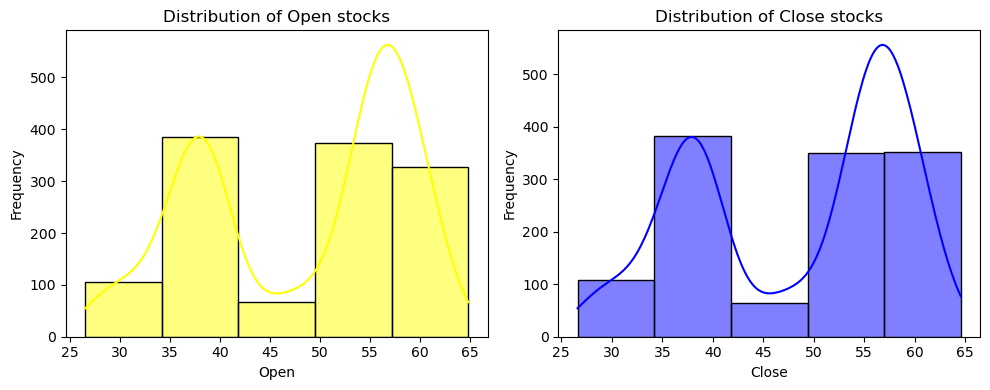

In [15]:
#Distribution of histograms
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
#Histogram distribution on Open stocks
sns.histplot(stocks_['open'], bins= 5, color= 'yellow', edgecolor='black',kde=True)
plt.title('Distribution of Open stocks')
plt.xlabel('Open')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
#Histogram distribution on close stocks
sns.histplot(stocks_['close'], bins= 5, color= 'blue', edgecolor='black',kde=True)
plt.title('Distribution of Close stocks')
plt.xlabel('Close')
plt.ylabel('Frequency')


plt.tight_layout()

Text(0, 0.5, 'Frequency')

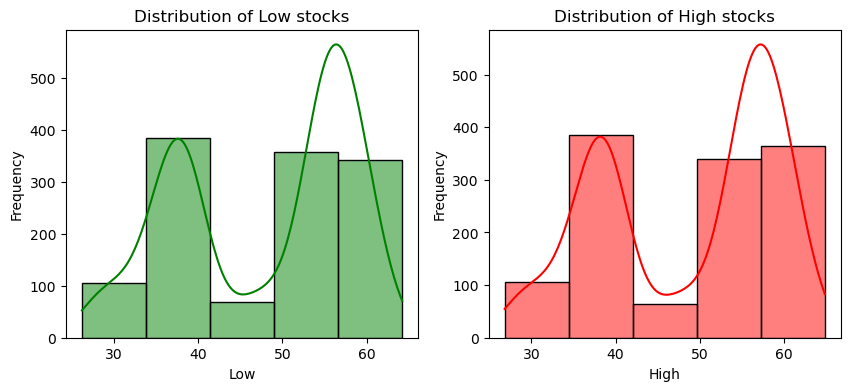

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
#Histogram distribution on  High stocks
sns.histplot(stocks_['low'], bins= 5, color= 'green', edgecolor='black', kde=True)
plt.title('Distribution of Low stocks')
plt.xlabel('Low')
plt.ylabel('Frequency')

#Histogram distribution on  Low stocks
plt.subplot(1,2,2)
sns.histplot(stocks_['high'], bins= 5, color= 'red', edgecolor='black', kde=True)
plt.title('Distribution of High stocks')
plt.xlabel('High')
plt.ylabel('Frequency')

In [17]:
X_train = X_scaled.drop('volume', axis=1)
y_train = X_scaled['volume']
X_valid = X_scaled.drop('volume', axis=1)
y_valid = X_scaled['volume']

In [18]:
# Neural Network Architecture
model = keras.Sequential([
    #input layer
    layers.Dense(1024, activation='relu', input_shape=[4]),
    #hidden layers
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    #output layer
    layers.Dense(1)

])

In [41]:
#Algorithms to reduce error
model.compile(optimizer='adam',loss='mae')

In [42]:
#Train models
history = model.fit(X_train, y_train, batch_size=128,epochs=500, validation_data=(X_valid,y_valid), verbose=0)

In [45]:
history_df = pd.DataFrame(history.history)

In [47]:
history_df.head()

,loss,val_loss
0,0.486995,0.481917
1,0.469089,0.445542
2,0.445854,0.440152
3,0.495158,0.475657
4,0.468611,0.467890


<Axes: >

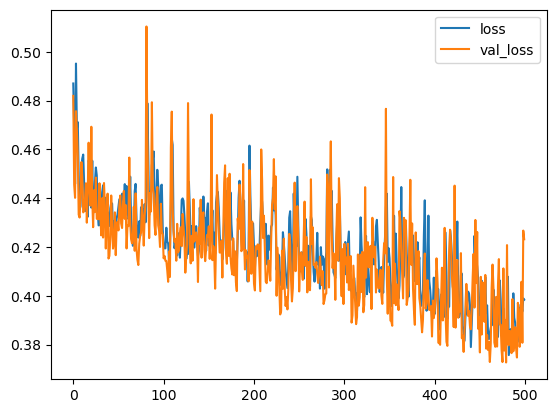

In [49]:
history_df.loc[:,['loss','val_loss']].plot()

### The above visualization indicates that the model has learnt well. Both the training and validation  losses decrease overtime and remain close to each other, demonstrating good generalization to the validation data without significant signs of overfitting and underfitting.